In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 
import csv
from IPython.display import display, Math
from numpy import unravel_index
from astropy.io import fits
from astropy.table import Table, vstack
import matplotlib.colors
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

plt.rcParams["font.family"] = "TeX Gyre Schola Math"

print("Comparison")

Comparison


In [3]:
def Convert(List):
    #___ Description_____________________________________________________________________________________
    #Arguments:: just a list of shape 4*1: [alpha, alpha_unc, delta, delta_unc], all in µas/yr
    #Returns:: same list but with its elements converted into km/s
    #____________________________________________________________________________________________________
    Result = []
    for value in List:
        Result.append(value*3.6907659441782648)

    return Result

In [4]:
def Plot(ListsOfValues):
    plt.figure(figsize=(8, 8))
    
    Colors = ['#B5750A', '#', '#', '#', '#B51F0A', "#00688B", "#00688B", "gray"]
    
    for i in range(len(ListsOfValues)):
        plt.errorbar(ListsOfValues[i][0], ListsOfValues[i][2], ListsOfValues[i][3], ListsOfValues[i][1],
                 marker=ListsOfValues[i][6], markersize=7, color=ListsOfValues[i][5],
                 ecolor=ListsOfValues[i][5], barsabove=True, capsize=3, label=ListsOfValues[i][4])

    plt.legend()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(r'$v_{\alpha}$ (km.s$^{-1}$)', fontname = 'Serif', size = 19)
    plt.ylabel(r'$v_{\delta}$ (km.s$^{-1}$)', fontname = 'Serif', size = 19)
    plt.gca().invert_xaxis()
    plt.savefig('Comparison.pdf')
    plt.show()

In [5]:
vdM_08 = [78, 41, -38, 34]
vdM_08.append("vdM08")
vdM_08.append("#B5750A")
vdM_08.append("o")

S_12   = Convert([42.2, 12.3, -30.9, 11.7])
S_12.append("Sohn12")
S_12.append("#750AB5")
S_12.append("o")

vdM_19 = Convert([65, 18, -57, 15])
vdM_19.append("vdM19")
vdM_19.append("#B50AA0")
vdM_19.append("o")

s_21_B = [159.8, 20.7, -111.2, 17.4]
s_21_B.append("Salomon21")
s_21_B.append("#0D4F8B")
s_21_B.append("o")

s_21_R = [134.8, 29.9, -293.6, 25.2]
s_21_R.append("Salomon21")
s_21_R.append("#660000")
s_21_R.append("o")

a_23_B = Convert([44.6, 19.6, -28.0, 16.2])
a_23_B.append("Gaia DR3")
a_23_B.append("#00008B")
a_23_B.append("o")
a_23_R = Convert([41.6, 25.5, -72.6, 21.0]) 
a_23_R.append("Gaia DR3")
a_23_R.append("#cc0000")
a_23_R.append("o")

#My result without the quadrants
l_23_B = Convert([43.9, 5.1, -27.6, 4.1])
l_23_B.append("Gaia DR3 (no quadrant)")
l_23_B.append("#00008B")
l_23_B.append("*")
l_23_R = Convert([41.8, 6.1, -72.6, 5.1])
l_23_R.append("Gaia DR3 (no quadrant)")
l_23_R.append("#cc0000")
l_23_R.append("*")

#Correcting for the QSOs
S_21_B = [178.7, 38.1, -142.7, 28.9]
S_21_B.append("Salomon21")
S_21_B.append("#0D4F8B")
S_21_B.append("d")
S_21_R = [153.7, 43.8, -325.1, 34.2]
S_21_R.append("Salomon21")
S_21_R.append("#660000")
S_21_R.append("d")

A_23_B = Convert([47.8, 23.7, -19.7, 19.7])
A_23_B.append("Gaia DR3 (QSOs correction)")
A_23_B.append("#00008B")
A_23_B.append("d")
A_23_R = Convert([43.1, 28.9, -65.8, 23.7])
A_23_R.append("Gaia DR3 (QSOs correction)")
A_23_R.append("#cc0000")
A_23_R.append("d")

## Quadrants and no quadrants

In a way here we show each of the three different steps I had. The first one corresponds to my results considering all of the stars around M31, without taking into account any kind of quadrant. The second makes that change, this time determining a global motion taking as input the stars in each of the different quadrants. The last one uses the value (determine via a likelihood method) of the proper motion of the QSOs in each of the quadrants. This explains why the uncertainties are slightly bigger after each steps, in the first we have a rather large sample of stars. In the second, this sample is subdivided in 4, we results in drastically increasing the uncertainties. And finally the last increase in the uncertainties come from the fact that we ad the ones we had from the determination of the uncertainties of the QSOs.

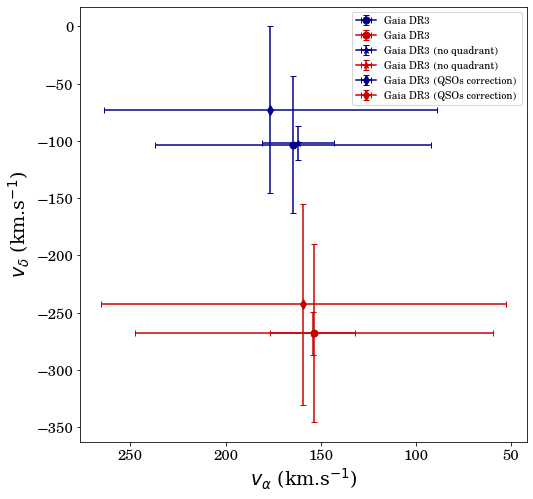

In [9]:
Plot([a_23_B, a_23_R, l_23_B, l_23_R, A_23_B, A_23_R])

## Comparison of my results with Salomon for the corrected values (QSOs)

'texgyreschola-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


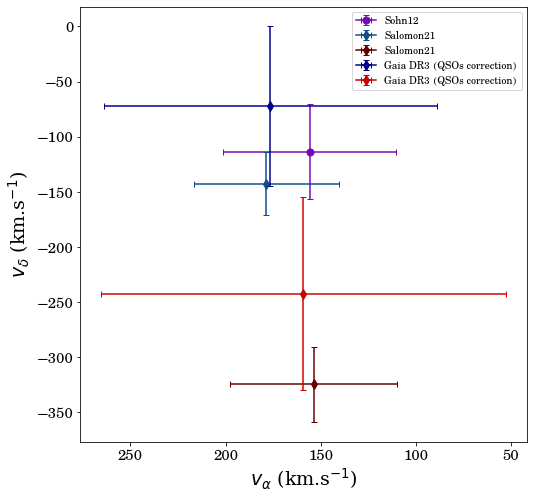

In [10]:
Plot([S_12, S_21_B, S_21_R, A_23_B, A_23_R])

## Compared to the rest

'texgyreschola-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


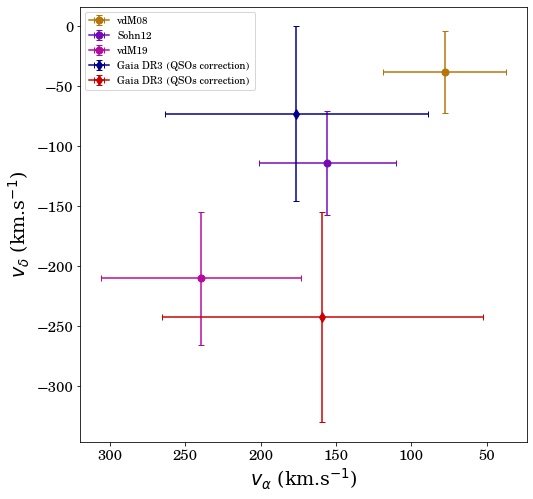

In [7]:
Plot([vdM_08, S_12, vdM_19, A_23_B, A_23_R])

## Confusion heliocentric/galactic

In [13]:
H_23_B = Convert([40.8, 6.4, -73.5, 5.2])
H_23_B.append("Helio correction")
H_23_B.append("#00008B")
H_23_B.append("p")

H_23_R = Convert([81.6, 5.1, -49.0, 4.1])
H_23_R.append("Helio correction")
H_23_R.append("#cc0000")
H_23_R.append("p")

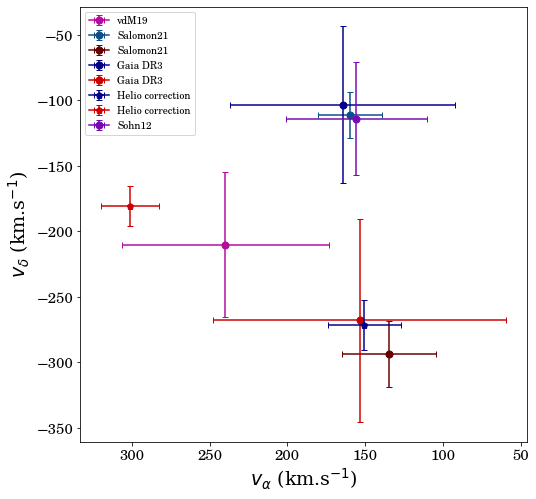

In [14]:
Plot([vdM_19, s_21_B, s_21_R, a_23_B, a_23_R, H_23_B, H_23_R, S_12])

# MEGA FINAL

In [13]:
BlueSmall = Convert([48.9, 15.8, -19.2, 9.0])
BlueSmall.append("small")
BlueSmall.append("blue")
BlueSmall.append("p")

BlueBig = Convert([48.9, 51.9, -19.2, 30.2])
BlueBig.append("big")
BlueBig.append("blue")
BlueBig.append("p")

In [14]:
RedSmall = Convert([43.1, 9.5, -65.7, 8.7])
RedSmall.append("small")
RedSmall.append("#cc0000")
RedSmall.append("p")

RedBig = Convert([43.1, 29.3, -65.7, 30.7])
RedBig.append("big")
RedBig.append("#cc0000")
RedBig.append("p")

'texgyreschola-math.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


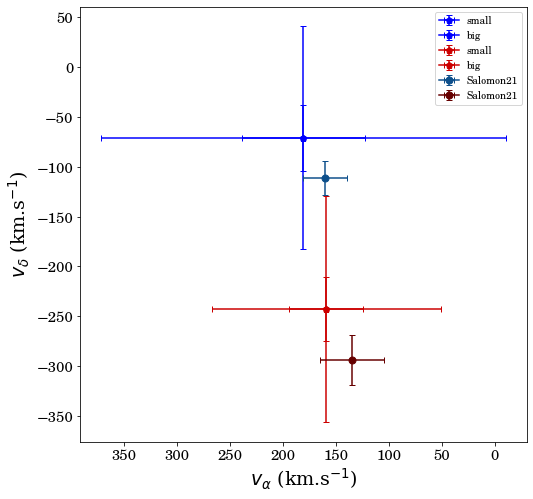

In [15]:
Plot([BlueSmall, BlueBig, RedSmall, RedBig, s_21_B, s_21_R])